In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import json
from pathlib import Path

from sklearn.feature_extraction.text import CountVectorizer, BaseEstimator

In [4]:
def json_reader(absolute_parent_path):
    file_list = [str(i) for i in Path(absolute_parent_path).glob('**/*.json')]
    for file in file_list:
        with open(file) as json_data:
            yield json.load(json_data)
            #total_data.append(data_raw)
    return total_data

In [5]:
[i for i in Path('/data/capstone_data/messages/inbox/').glob('**/*.json') if 'animal' in str(i)]

[PosixPath('/data/capstone_data/messages/inbox/animalxing_ca7snfde2q/message_1.json')]

In [6]:
with open('/data/capstone_data/messages/inbox/animalxing_ca7snfde2q/message_1.json') as json_data:
    acnh_data_raw = json.load(json_data)

In [8]:
acnh_data_raw

{'participants': [{'name': 'Eric Baek'},
  {'name': 'Kevin Dang'},
  {'name': 'Sapphire Tseng'},
  {'name': 'Ada Leung'},
  {'name': 'ë°\x95í\x9a¨ì\x84\x9d'},
  {'name': 'Christie Huynh'},
  {'name': 'Andrew Shatz'},
  {'name': 'Erin Cureau'},
  {'name': 'Ydennek Torri'},
  {'name': 'Una Smith'},
  {'name': 'Janilyn Shatz'},
  {'name': 'Vivian Nguyen'},
  {'name': 'Michael Hale'},
  {'name': 'Le Koi'},
  {'name': 'Lucinda Smith'}],
 'messages': [{'sender_name': 'ë°\x95í\x9a¨ì\x84\x9d',
   'timestamp_ms': 1597503321463,
   'content': "Ok well if you guys are still playing, good to know. I'll keep sending",
   'reactions': [{'reaction': 'ð\x9f\x91\x8d', 'actor': 'Andrew Shatz'},
    {'reaction': 'ð\x9f\x92\x97', 'actor': 'Sapphire Tseng'},
    {'reaction': 'ð\x9f\x91\x8d', 'actor': 'Ada Leung'}],
   'type': 'Generic'},
  {'sender_name': 'Andrew Shatz',
   'timestamp_ms': 1597503173123,
   'content': 'I got on to check out the diving last week. Not worth hopping on everyday.',
   'type': 

In [33]:
acnh_content = pd.DataFrame([i for i in acnh_data_raw['messages']])[['timestamp_ms', 'content']]

<AxesSubplot:>

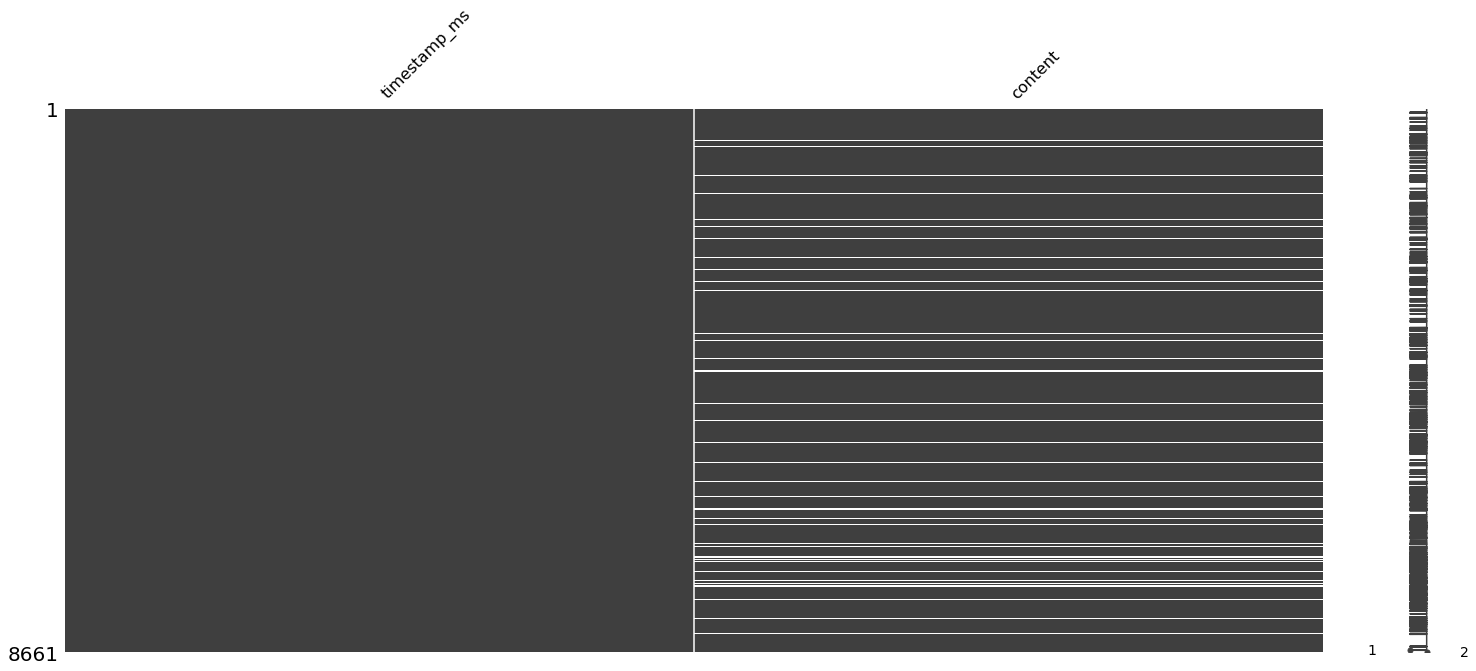

In [39]:
msno.matrix(acnh_content)

In [40]:
acnh_content = acnh_content.dropna()

In [41]:
cv = CountVectorizer(stop_words='english')

In [45]:
matrix = cv.fit_transform(acnh_content['content'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])
df_words = pd.DataFrame(freqs, columns=['word','count'])

In [55]:
df_words.sort_values(by='count', ascending=False).head(20)

,word,count
1624,iâ,694
1801,ll,547
2193,open,417
1816,lol,398
1652,just,367
3312,want,345
1341,got,290
1782,like,282
1608,island,263
3047,thanks,238
